In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np
from main import disk_size, head, direction, random_request
from algorithm.scan import SCAN
from algorithm.cscan import CSCAN
from algorithm.clook import CLOOK

In [7]:
# Store averages
avg_seek_time_SCAN = []  
avg_seek_time_CSCAN = [] 
avg_seek_time_CLOOK = []

# Store worst case
worst_seek_time_SCAN = []  
worst_seek_time_CSCAN = [] 
worst_seek_time_CLOOK = []






for size in random_request:
    # Generate 'size' random requests
    arr = [random.randint(0, disk_size-1) for _ in range(size)]

    print(f"\nRunning SCAN algorithm for {size} requests:")
    scan_avg, scan_worst = SCAN(disk_size, arr, head, direction)

    # Store all average in avg_seek_time_SCAN
    avg_seek_time_SCAN.append(scan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_SCAN.append(scan_worst)

    

    print(f"\nRunning C-SCAN algorithm for {size} requests:")
    cscan_avg, cscan_worst = CSCAN(disk_size, arr, head)

     # Store all average in avg_seek_time_CSCAN
    avg_seek_time_CSCAN.append(cscan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CSCAN.append(cscan_worst)



    print(f"\nRunning C-LOOK algorithm for {size} requests:")
    clook_avg, clook_worst = CLOOK(arr, head)

    # Store all average in avg_seek_time_CLOOK
    avg_seek_time_CLOOK.append(clook_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CLOOK.append(clook_worst)



Running SCAN algorithm for 10 requests:
Total number of seek operations = 230
Average seek time = 20.90909090909091
Worst-case seek time = 68
Seek Sequence is
25
0
68
77
82
88
100
140
141
157
180

Running C-SCAN algorithm for 10 requests:
Total number of seek operations = 373
Average seek time = 31.083333333333332
Worst-case seek time = 199
Seek Sequence is
68
77
82
88
100
140
141
157
180
199
0
25

Running C-LOOK algorithm for 10 requests:
Total number of seek operations = 285
Average seek time = 28.5
Worst-case seek time = 155
Seek Sequence is
68
77
82
88
100
140
141
157
180
25

Running SCAN algorithm for 20 requests:
Total number of seek operations = 235
Average seek time = 11.19047619047619
Worst-case seek time = 62
Seek Sequence is
48
45
43
27
22
11
4
0
62
65
71
78
82
104
114
118
122
141
156
157
185

Running C-SCAN algorithm for 20 requests:
Total number of seek operations = 396
Average seek time = 18.0
Worst-case seek time = 199
Seek Sequence is
62
65
71
78
82
104
114
118
122
141

In [8]:
print("Average Seek Time\n")
print("SCAN   ", avg_seek_time_SCAN)
print("CSCAN  ", avg_seek_time_CSCAN)
print("CLOOK  ", avg_seek_time_CLOOK)

print("\nWorst Seek Time\n")
print("SCAN   ", worst_seek_time_SCAN)
print("CSCAN  ", worst_seek_time_CSCAN)
print("CLOOK  ", worst_seek_time_CLOOK)


Average Seek Time

SCAN    [20.90909090909091, 11.19047619047619, 4.96, 2.4653465346534653]
CSCAN   [31.083333333333332, 18.0, 7.705882352941177, 3.8823529411764706]
CLOOK   [28.5, 18.0, 7.6938775510204085, 3.94]

Worst Seek Time

SCAN    [68, 62, 53, 56]
CSCAN   [199, 199, 199, 199]
CLOOK   [155, 181, 191, 198]


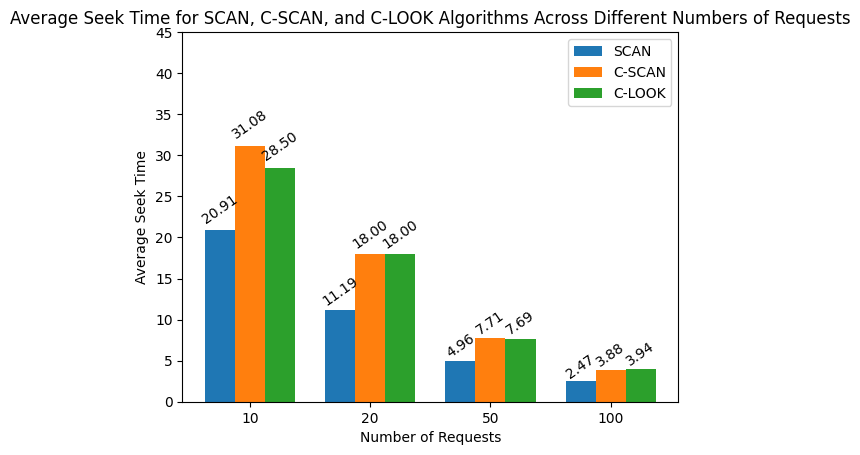

In [26]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, avg_seek_time_SCAN, width, label='SCAN')
rects2 = ax.bar(x, avg_seek_time_CSCAN, width, label='C-SCAN')
rects3 = ax.bar(x + width, avg_seek_time_CLOOK, width, label='C-LOOK')


# Labelling
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Average Seek Time')
ax.set_title('Average Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# Set the y-axis limit
ax.set_ylim(0, 45)


# Function to add label on bar chart
# Function to add label on bar chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%.2f' % float(height),
                ha='center', va='bottom', rotation=35)

# Call function to add label
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

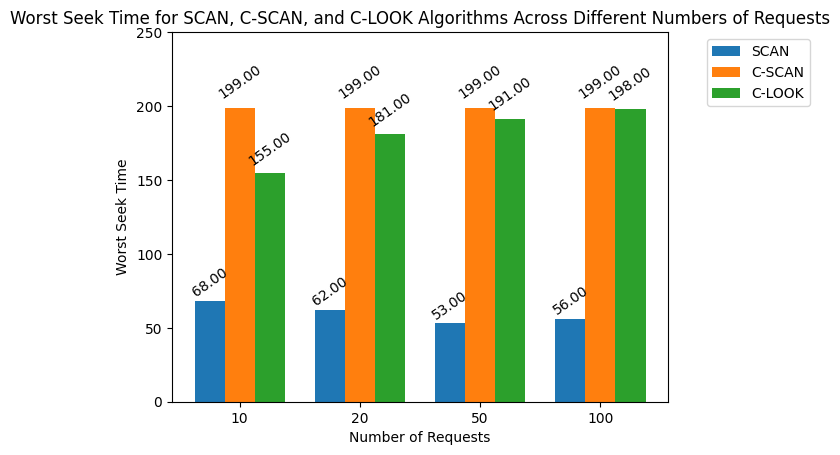

In [27]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, worst_seek_time_SCAN, width, label='SCAN')
rects2 = ax.bar(x, worst_seek_time_CSCAN, width, label='C-SCAN')
rects3 = ax.bar(x + width, worst_seek_time_CLOOK, width, label='C-LOOK')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Worst Seek Time')
ax.set_title('Worst Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)


# Legend placement
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))


# Set the y-axis limit
ax.set_ylim(0, 250)


# Call function to add label
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()